In [1]:
!pip install tensorflow==2.1

     |████████████████████████████████| 421.8 MB 27 kB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 3.8 MB 34.5 MB/s 
     |████████████████████████████████| 448 kB 51.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=eee0bd2ddcb8c41b37565ef96bc8abf7d975d12fea3f06183aeece0524e99a47
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
from tensorflow.keras.layers import SimpleRNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.6102 - acc: 0.6546 - val_loss: 0.4536 - val_acc: 0.8002
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3760 - acc: 0.8436 - val_loss: 0.3793 - val_acc: 0.8422
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.2920 - acc: 0.8849 - val_loss: 0.3652 - val_acc: 0.8458
Epoch 4/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.2219 - acc: 0.9182 - val_loss: 0.3678 - val_acc: 0.8430
Epoch 5/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.1641 - acc: 0.9416 - val_loss: 0.4085 - val_acc: 0.8310
Epoch 6/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.1098 - acc: 0.9632 - val_loss: 0.4592 - val_acc: 0.8404
Epoch 7/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.0745 - acc: 0.9759 - val_loss: 0.4

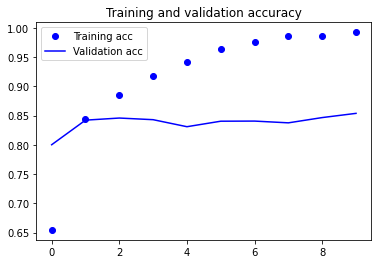

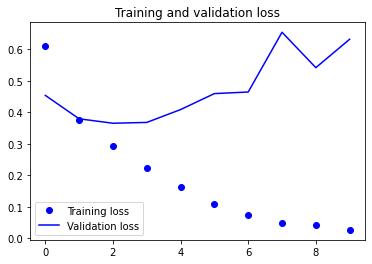

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/sample - loss: 0.5037 - acc: 0.7685 - val_loss: 0.3399 - val_acc: 0.8634
Epoch 2/10
20000/20000 [==============================] - 15s 734us/sample - loss: 0.2801 - acc: 0.8907 - val_loss: 0.4981 - val_acc: 0.8392
Epoch 3/10
20000/20000 [==============================] - 15s 729us/sample - loss: 0.2244 - acc: 0.9161 - val_loss: 0.2812 - val_acc: 0.8920
Epoch 4/10
20000/20000 [==============================] - 15s 729us/sample - loss: 0.1933 - acc: 0.9294 - val_loss: 0.3436 - val_acc: 0.8448
Epoch 5/10
20000/20000 [==============================] - 15s 733us/sample - loss: 0.1696 - acc: 0.9395 - val_loss: 0.3052 - val_acc: 0.8878
Epoch 6/10
20000/20000 [==============================] - 15s 732us/sample - loss: 0.1534 - acc: 0.9466 - val_loss: 0.3139 - val_acc: 0.8890
Epoch 7/10
20000/20000 [==============================] - 15s 732us/sample - loss: 0.1380 - acc: 0.9510 - v

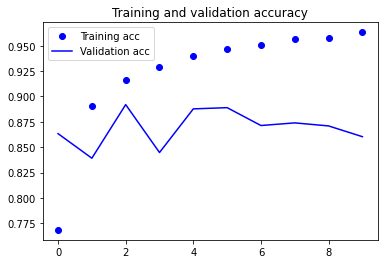

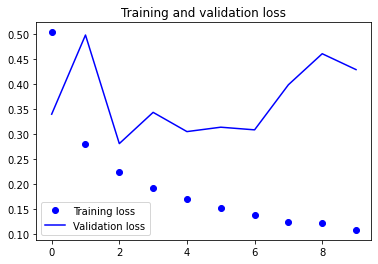

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()